# Introducción a la estadística descriptiva
Existen dos ramas de la estadística:
- **Estadística descriptiva:** Trata de resumir información de manera cuantitativa para entender de forma sencilla y concreta sobre algún determinado asunto
- **Estadística inferencia:** Se basa en realizar inferencias, deducir que podría pasar en el futuro en base a lo datos que tenemos acceso en la actualidad

### Tipos de datos

- **Categóricos o cualitativos**: Representan características como el género, el idioma, etc. de una persona. También pueden tomar valores numéricos, por ejemplo: 1 para mujeres y 0 para hombres. Hay que tener en cuenta que esos números no tienen significado matemático. Existen dos subtipos:
    - Nominales: No importa el orden
    - Ordinales: Si tienen un orden

- **Numéricos o cuantitativos**  Representan una medida o recuento. Se pueden dividir en dos:
    - Discretos: Solo pueden tomar valores de un conjunto y son separados
    - Continuos: Representan mediciones y toman valores en intervalos continuos.


# Medidas de tendencia central
Permiten resumir información a un solo número de un cierto conjunto de datos. Las principales 3 son las siguientes:
- Media:
$$ \bar{x} = \dfrac{1}{N} \sum_{i=1}^{N}x_i$$
- Mediana (dato central de un conjunto ordenado):
$$ mediana = \left\{\begin{matrix}
\frac{X_{[N/2]} +X_{[N/2 +1]}}{2} \quad N \; par \\ 
X_{[(N+1)/2]}\quad N \; impar
\end{matrix}\right.$$
- Moda (dato que más se repite)

Las media es suceptible a valores atipicos por lo que cuando los datos presentan muchos de ellos, lo mejor es reportar la mediana. La moda no aplica para datos numéricos continuos.

In [3]:
import pandas as pd

#dataset de diferentes marcas, modelos y otras caracteristicas de carros
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
#principales estadisticos
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


Nos enfocamos en la columna "price_usd" (variable numérica continua)

In [5]:
#nos enfocamos en una columna
df['price_usd'].mean()

6639.971021255613

In [6]:
df['price_usd'].median()

4800.0

Como la media y mediana son muy distintos significa que hay un alta dispersion de los datos. Esto lo podemos corroborar con un histograma.

<AxesSubplot: ylabel='Frequency'>

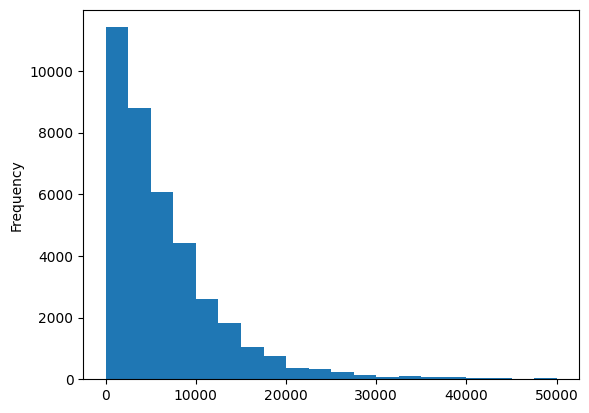

In [7]:
df['price_usd'].plot.hist(bins=20)

Visualizaremos la distribución de los precios por marca.

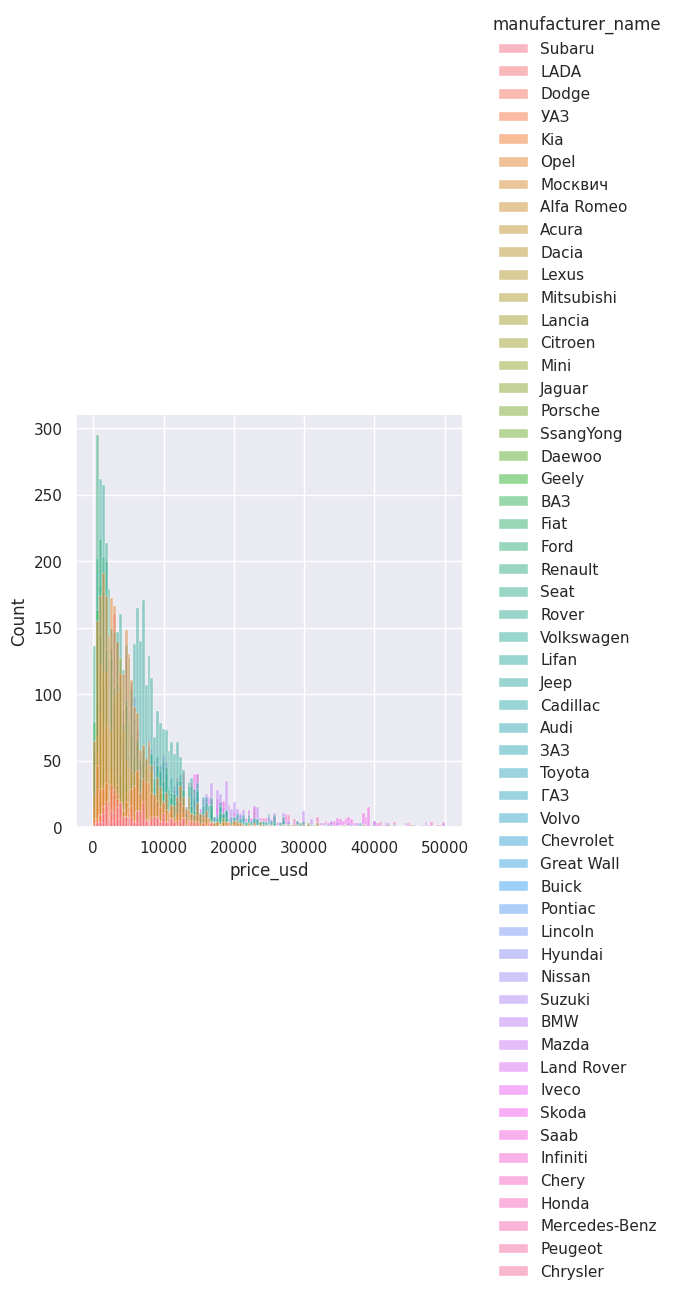

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name')

lizamos la distribución de los precios por combustible

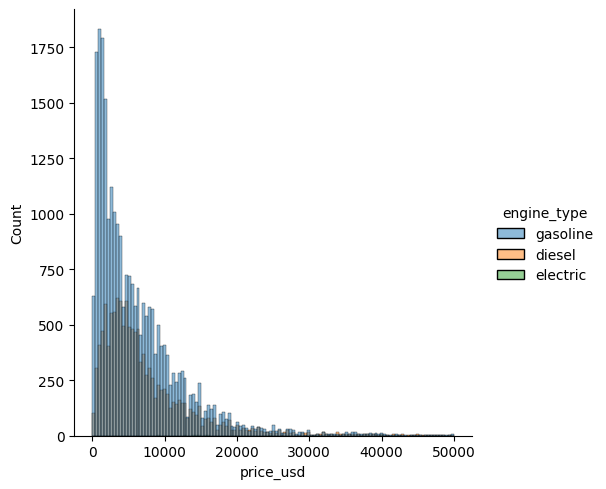

In [9]:
sns.displot(df, x="price_usd", hue="engine_type")

In [11]:
#agrupamos por tipo de combustible y realizamos un conteo de cuantos autos hay
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


# Medidas de dispersion
Las visualizaciones anteriores inducen a una medida para saber que tan dispersos están mis datos. En estadística existen 3 principales:
- Rango (valor maximo - valor minimo). Indica la longitud del intervalo en el que los datos se encuentran.
- Rango intercuantil.  Se basa en los cuartiles, que son 4 subdivisiones del dataset y que dividen los datos en partes iguales. La distancia entre el cuartil 1 y el cuartil 3 es el rango intercuantil. 
- Desviación estandar. Es la medida de dispersion más utilizada:
$$ \sigma = \sqrt{\dfrac{1}{N-1} \sum_{i=1}^{n} (x_i -\mu)^2} $$

In [12]:
# desviacion estandar del precio de los carros
df['price_usd'].std()

6428.1520182029035

In [13]:
#rango
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [27]:
#cuantiles
median = df['price_usd'].median()
q1 = df['price_usd'].quantile(q = 0.25)
q3 = df['price_usd'].quantile(q = 0.75)
iqr = q3-q1 #rango intercuantil
iqr

6890.0

In [17]:
median

4800.0

### Limite para detección de outliers (datos simetricamente distribuidos)
Cuando tenemos una distribución de datos, muchas veces es importante reconocer los outliers para verificar si aportan o no información.

En una distribución simétrica como la gausiana, normalmente los outliers son aquellos que estan fuera del rango entre $(Q_1 -1.5 \times IQR)$ y $(Q_1 +1.5 \times IQR)$ 

In [19]:
minlimit = q1 - 1.5*iqr
maxlimit = q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


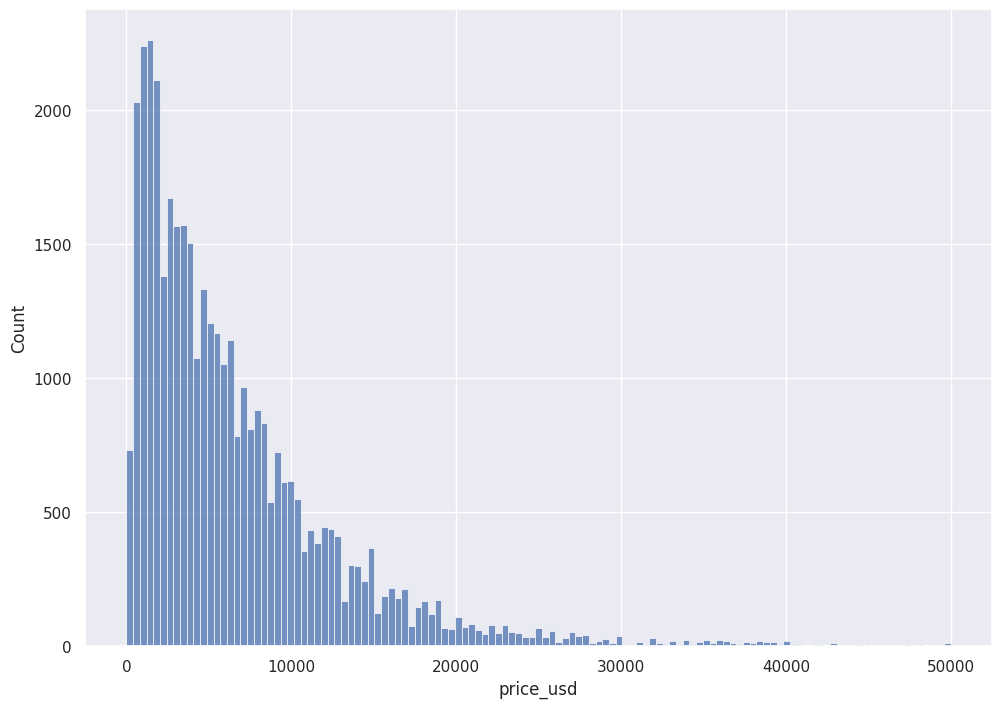

In [25]:
#distribucion de los datos a traves de un histograma
sns.histplot(df['price_usd'])
plt.show()

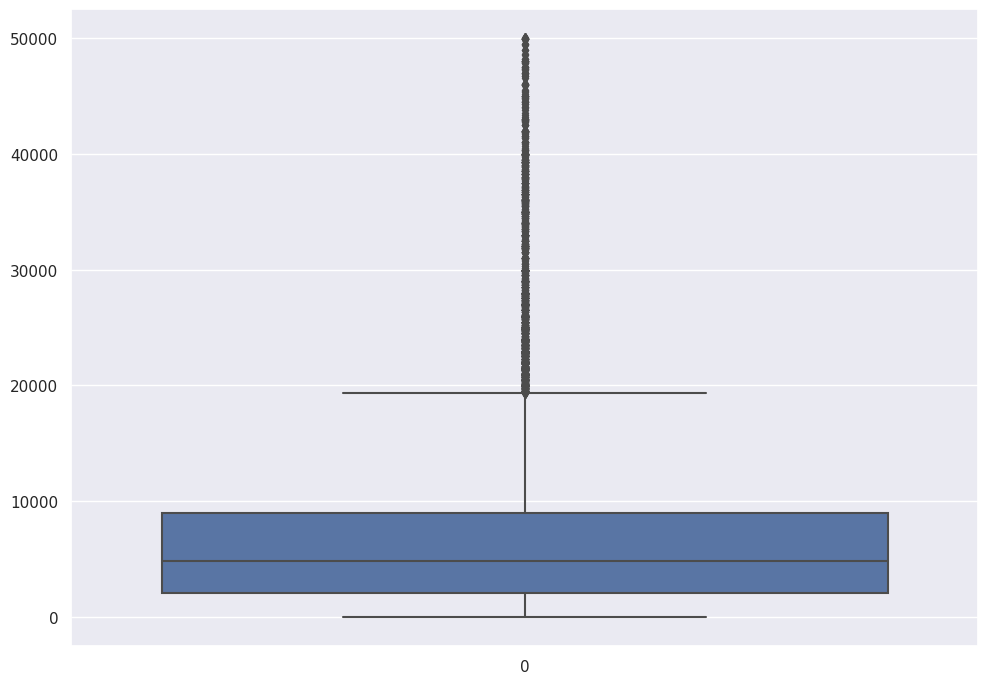

In [26]:
#visualizacion de los cuantiles a traves de una grafica de caja y brazos
sns.boxplot(df['price_usd'])
plt.show()

Es posible calcular varios box-plot separando por una cierta variable categórica:

<AxesSubplot: xlabel='engine_fuel', ylabel='price_usd'>

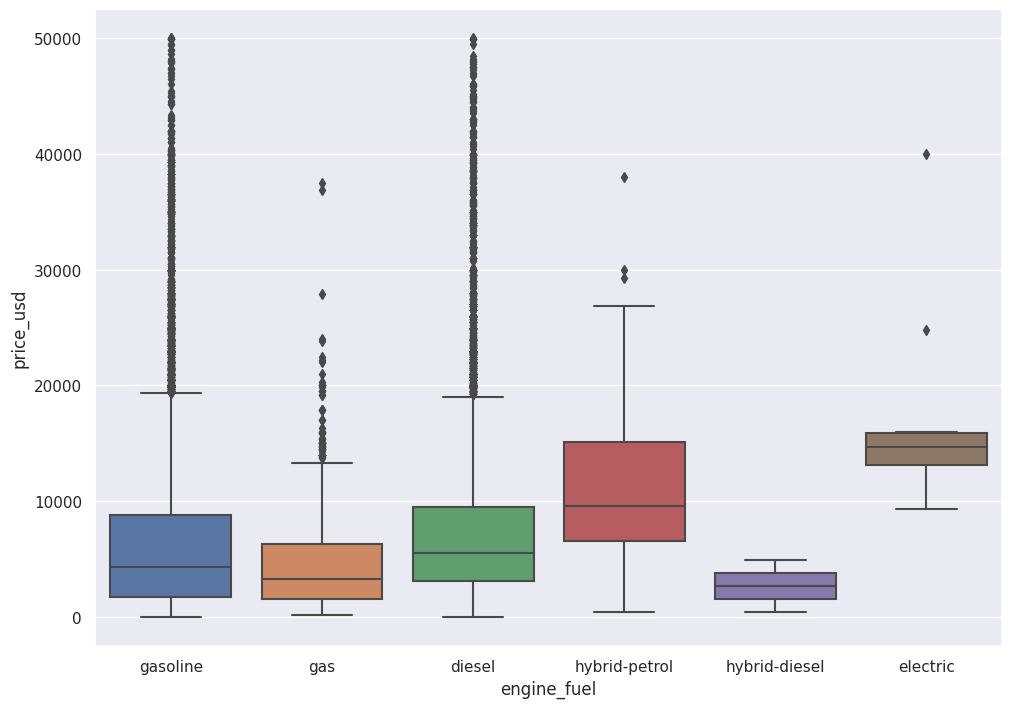

In [23]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)